In [91]:
%matplotlib inline
import yfinance as yf

period = 50

In [92]:
nasdaq = yf.Ticker("^IXIC")

In [93]:
# get stock info
nasdaq.info

{'exchange': 'NIM',
 'shortName': 'NASDAQ Composite',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '-14400000',
 'quoteType': 'INDEX',
 'symbol': '^IXIC',
 'messageBoardId': 'finmb_INDEXIXIC',
 'market': 'us_market',
 'previousClose': 14427.237,
 'regularMarketOpen': 14236,
 'twoHundredDayAverage': 13686.435,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 14313.596,
 'navPrice': None,
 'averageDailyVolume10Day': 4284418000,
 'totalAssets': None,
 'regularMarketPreviousClose': 14427.237,
 'fiftyDayAverage': 14270.183,
 'trailingAnnualDividendRate': None,
 'open': 14236,
 'toCurrency': None,
 'averageVolume10days': 4284418000,
 'expireDate': None,
 'yield': None,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 14178.657,
 'priceHint': 2,

In [94]:
# get historical market data
nasdaq_hist = nasdaq.history(period="max")

In [95]:
nasdaq_hist['Close']

Date
1971-02-05      100.000000
1971-02-08      100.839996
1971-02-09      100.760002
1971-02-10      100.690002
1971-02-11      101.449997
                  ...     
2021-07-13    14677.650391
2021-07-14    14644.950195
2021-07-15    14543.129883
2021-07-16    14427.240234
2021-07-19    14274.980469
Name: Close, Length: 12357, dtype: float64

In [96]:
# MA50
nasdaq_hist['Close'].mean()

2073.9854238941857

In [97]:
# EMA50
nasdaq_hist['Close'].ewm(span=50, adjust=False).mean()[-1]

14167.013225749337

In [98]:
# EMA21
nasdaq_hist['Close'].ewm(span=21, adjust=False).mean()[-1]

14433.882776060655

In [99]:
def stochastics( dataframe, low, high, close, k, d ):
    """
    https://stackoverflow.com/questions/30261541/slow-stochastic-implementation-in-python-pandas
    Fast stochastic calculation
    %K = (Current Close - Lowest Low)/
    (Highest High - Lowest Low) * 100
    %D = 3-day SMA of %K

    Slow stochastic calculation
    %K = %D of fast stochastic
    %D = 3-day SMA of %K

    When %K crosses above %D, buy signal
    When the %K crosses below %D, sell signal
    """

    df = dataframe.copy()

    # Set minimum low and maximum high of the k stoch
    low_min  = df[low].rolling( window = k ).min()
    high_max = df[high].rolling( window = k ).max()

    # Fast Stochastic
    df['k_fast'] = 100 * (df[close] - low_min)/(high_max - low_min)
    df['d_fast'] = df['k_fast'].rolling(window = d).mean()

    # Slow Stochastic
    df['k_slow'] = df["d_fast"]
    df['d_slow'] = df['k_slow'].rolling(window = d).mean()

    return df


stochs = stochastics( nasdaq_hist[-period:], 'Low', 'High', 'Close', 14, 3 )
# slow_k = stochs['k_slow'].values
# fast_k = stochs['k_fast'].values
slow_k = stochs['k_slow']
fast_k = stochs['k_fast']

<ipython-input-101-afd9df7cdf7f>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


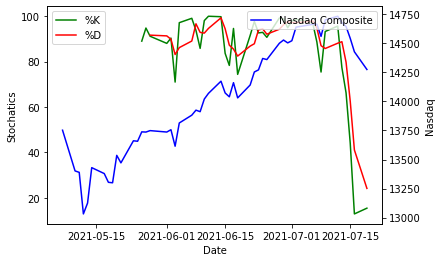

In [101]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.set_ylabel("Stochatics")
ax1.set_xlabel("Date")
ax1.plot( fast_k,'g-',slow_k,'r-')
plt.legend(["%K","%D"],loc=2)

ax2 = ax1.twinx()
ax2.set_ylabel("Nasdaq")
ax2.plot(nasdaq_hist.index[-period:], nasdaq_hist["Close"][-period:],'b-')
ax2.legend(["Nasdaq Composite"],loc=1)
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

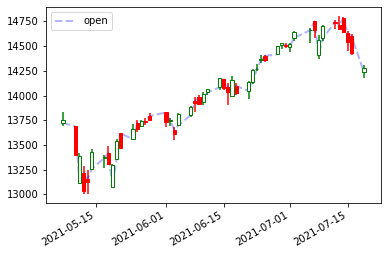

In [102]:
#Candle Graph
# 4.判断收盘价与开盘价 确定蜡烛颜色
import numpy as np
colors_bool = nasdaq_hist["Close"][-period:] >= nasdaq_hist["Open"][-period:]   # 上涨
colors = np.zeros(colors_bool.size, dtype="U5")
colors[:] = "r" # 下跌
colors[colors_bool] = "w"   # 上涨

# 5.确定蜡烛边框颜色
edge_colors = np.zeros(colors_bool.size, dtype="U1")
edge_colors[:] = "r"# 下跌
edge_colors[colors_bool] = "g"# 上涨

# 绘制开盘价折线图片

plt.plot(nasdaq_hist.index[-period:], nasdaq_hist["Open"][-period:], color="b", linestyle="--",
        linewidth=2, label="open", alpha=0.3)

# 6.绘制蜡烛
plt.bar(nasdaq_hist.index[-period:], (nasdaq_hist["Close"][-period:] - nasdaq_hist["Open"][-period:]), 0.8, bottom=nasdaq_hist["Open"][-period:], color=colors,
       edgecolor=edge_colors, zorder=3)

# 7.绘制蜡烛直线(最高价与最低价)
plt.vlines(nasdaq_hist.index[-period:], nasdaq_hist["Low"][-period:], nasdaq_hist["High"][-period:], color=edge_colors)

plt.legend()
plt.gcf().autofmt_xdate()
plt.show

<ipython-input-103-ead403717b1c>:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


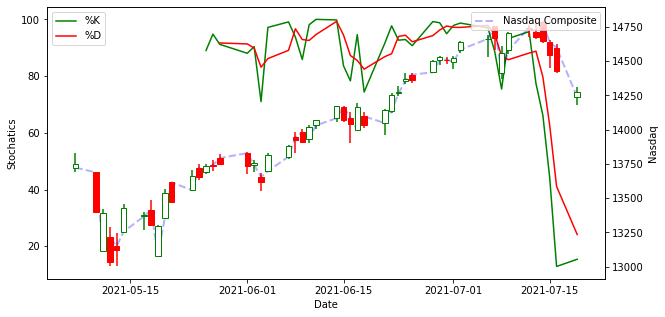

In [103]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=[10,5])

ax1 = fig.add_subplot(111)
ax1.set_ylabel("Stochatics")
ax1.set_xlabel("Date")
ax1.plot( fast_k,'g-',slow_k,'r-')
plt.legend(["%K","%D"],loc=2)

ax2 = ax1.twinx()
ax2.set_ylabel("Nasdaq")
# 4.判断收盘价与开盘价 确定蜡烛颜色
import numpy as np
colors_bool = nasdaq_hist["Close"][-period:] >= nasdaq_hist["Open"][-period:]   # 上涨
colors = np.zeros(colors_bool.size, dtype="U5")
colors[:] = "r" # 下跌
colors[colors_bool] = "w"   # 上涨

# 5.确定蜡烛边框颜色
edge_colors = np.zeros(colors_bool.size, dtype="U1")
edge_colors[:] = "r"# 下跌
edge_colors[colors_bool] = "g"# 上涨

# 绘制开盘价折线图片

ax2.plot(nasdaq_hist.index[-period:], nasdaq_hist["Open"][-period:], color="b", linestyle="--",
        linewidth=2, label="open", alpha=0.3)

# 6.绘制蜡烛
ax2.bar(nasdaq_hist.index[-period:], (nasdaq_hist["Close"][-period:] - nasdaq_hist["Open"][-period:]), 0.8, bottom=nasdaq_hist["Open"][-period:], color=colors,
       edgecolor=edge_colors, zorder=3)

# 7.绘制蜡烛直线(最高价与最低价)
ax2.vlines(nasdaq_hist.index[-period:], nasdaq_hist["Low"][-period:], nasdaq_hist["High"][-period:], color=edge_colors)

ax2.legend()
ax2.legend(["Nasdaq Composite"],loc=1)
fig.show()